In [1]:
# Это просто чтобы на проекторе всё было красиво.
# Не обращайте внимания

from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.8em;
line-height:1.0em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.4em;
line-height:1.3em;
padding-left:2em;
padding-right:2em;
}
</style>
""")

# Линейная регрессия

![](https://habrastorage.org/files/256/a5d/ed0/256a5ded03274e0f87ccf97164c31c35.png)

## Теория

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

Пусть есть некоторый числовой целевой признак $y$. Извеcтны признаки $X = [x_1, x_2, ... ,x_m]$. Модель регрессии предсказывает $y$ с помощью вычисления следующей взвешенной суммы $y = w_0 + \sum_{i=1}^{m}{w_i x_i}$. Добавив фиктивный признак $x_0 = 1$, можно будет записать $y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$. Если представить себе X как матрицу объектов-признаков, y - вектор столбец целевой переменной, а w - вектор-столбец коэффициентов, то получим матричную цапись: $$\Large \vec{y} = X\vec{w}$$

Один из способов вычислить значения параметров модели является метод наименьших квадратов (МНК), который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью:
$$
\large
\begin{array}
{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}
$$

Для решения данной оптимизационной задачи необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно $\vec w$ (частный случай был в лекции):

$$
\large
\begin{array}
{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}
$$

### Нормальное уравнение

Таким образом для аналитического вычисления весов линейной регрессии нужно решить это нормальное уравнение: $$\Large \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$

Матрица ${(X^TX)}^{-1}X^T$ - [псевдообратная](https://ru.wikipedia.org/wiki/%D0%9F%D1%81%D0%B5%D0%B2%D0%B4%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).
Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). На практике лучше находить вектор весов $w$ решением матричного уравнения $$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).
Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

### Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска. Градиентный шаг для весов будет выглядеть следующим образом: $$w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$$$ w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$ Здесь $\eta$ - параметр, шаг градиентного спуска.

### Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки: $$ w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$ $$ w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$ где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

#### Литература 
- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)


В домашнем задании надо будет вычислить всё **вручную** методом нормального уравнения.

![](https://ebanoe.it/wp-content/uploads/2016/03/alkogolik-question-how-to-live.jpg)

## Практика

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462

df = pd.read_csv('../../data/weights_heights.csv.gz', index_col='Index')
df['Height'] = df['Height'] / METER_TO_INCH
df['Weight'] = df['Weight'] / KILO_TO_POUND
df.head()

,Height,Weight
Index,,
1,1.670899,51.252597
2,1.816490,61.909672
3,1.762732,69.411917
4,1.732705,64.562328
5,1.721814,65.452141


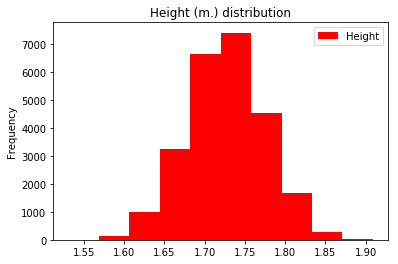

In [4]:
# Гистограмма роста
df.plot(y='Height', kind='hist', 
        color='red',  title='Height (m.) distribution')

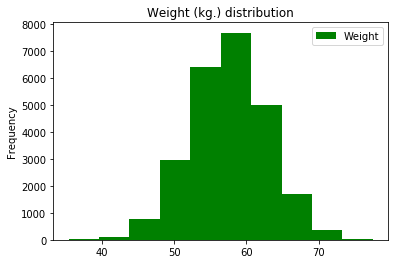

In [5]:
# Гистограмма веса
df.plot(y='Weight', kind='hist', 
        color='green',  title='Weight (kg.) distribution')

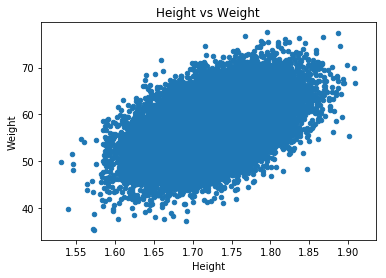

In [6]:
df.plot(kind='scatter', y='Weight', x='Height', title='Height vs Weight')

### Среднеквадратичная ошибка

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.

В нашем случае у нас 2 признака поэтому будет два параметра $w_0$ и $w_1$

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$

In [7]:
def error(x0, x1, w0, w1):
    return sum(map(lambda xi, yi: ((yi - (w0 + w1 * xi))**2), x0, x1))

In [8]:
weight, height = df['Weight'], df['Height']
print(error(weight,height, 1.3, 0.006))
print(error(weight,height, 0.6, 0.02))

209.696707597
226.277467799


Нарисуем на scatter plot эти две прямые, чтобы посмотреть как они улавливают закономерность.

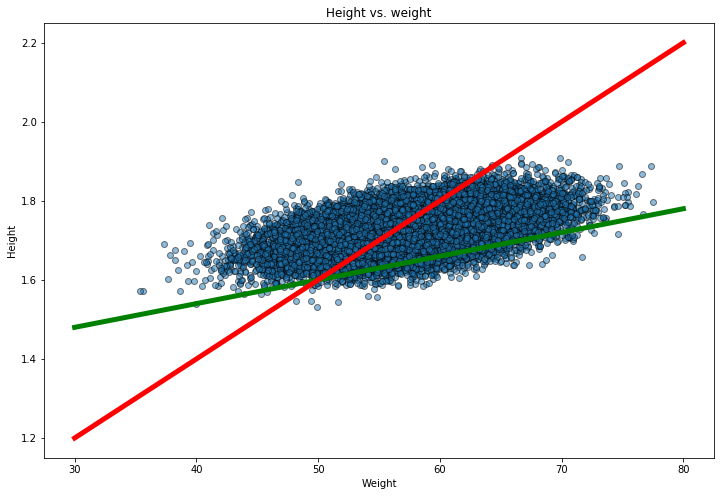

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')
x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, 1.3 + 0.006 * x, c='green', linewidth=5)
plt.plot(x, 0.6 + 0.02 * x, c='red', linewidth=5)

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Text(0.5,1,'error vs. w1 for w0=50')

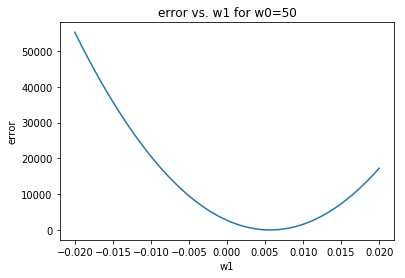

In [10]:
x = np.linspace(start=-0.02, stop=0.02, num=100)
y = error(weight, height, 1.4, x)
plt.plot(x, y)
plt.xlabel('w1')
plt.ylabel('error')
plt.title('error vs. w1 for w0=50')

Найдем оптимальное значение для $w_1$ при фиксированном $w_0 = 1.5$. Для этого воспользуемся методом `minimize_scalar`.

In [11]:
from scipy.optimize import minimize_scalar
w0 = 1.1
w1_opt = minimize_scalar(
    fun=lambda x: error(weight, height, w0, x), 
    bounds=(-0.2, 0.2)).x
w1_opt

0.010825437010092457

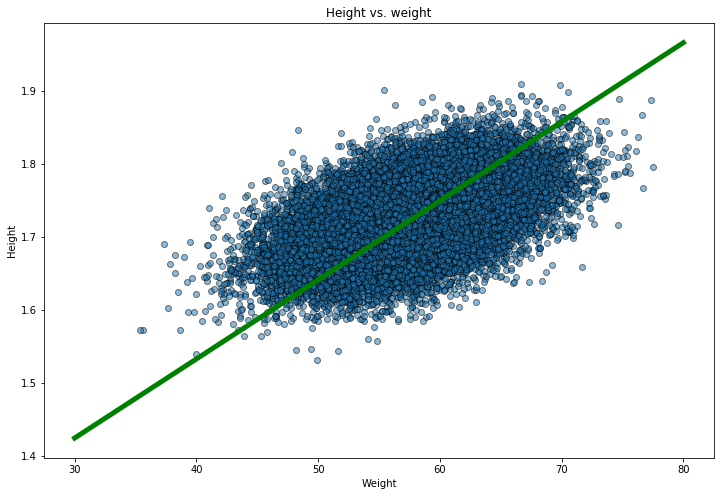

In [12]:
plt.figure(figsize=(12,8))

plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')

x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, w0 + w1_opt * x, c='green', linewidth=5)

В прошлых графиках мы фиксировали $w_0$ и рисовали двумерные график ошибок. Но по сути мы должны перебирать и $w_0$ и $w_1$, а это трёхмерный графки. Его тоже можно визулизировать.

Text(0.5,0,'Error')

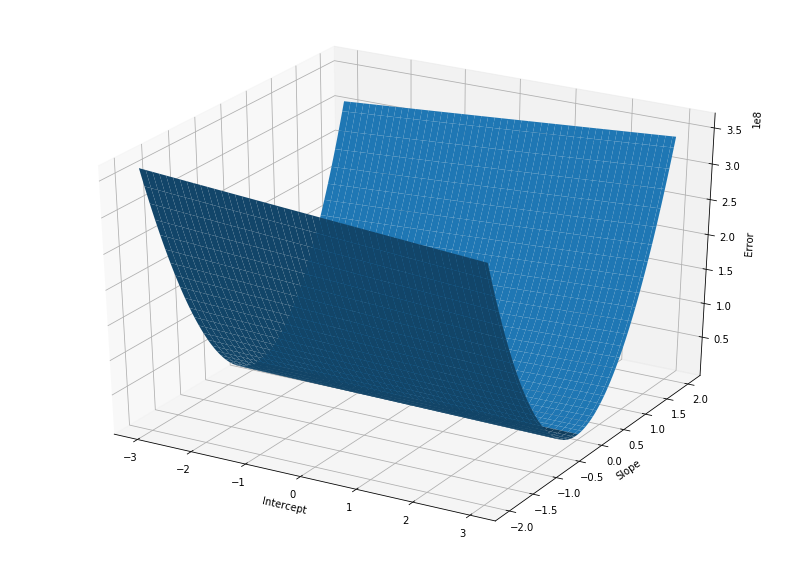

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # get current axis

w0 = np.linspace(start=-3, stop=3, num=100)
w1 = np.linspace(start=-2, stop=2, num=100)
w0, w1 = np.meshgrid(w0, w1)
z = error(weight, height, w0, w1)

ax.plot_surface(w0, w1, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')

Теперь найдем минимум функции ошибки по трехмерной функции с помощью метода `minimize` и оптимизатора `L-BFGS-B`.

In [14]:
from scipy.optimize import minimize

(w0_opt, w1_opt) = minimize(
    fun=lambda x: error(weight, height, x[0], x[1]), 
    x0=(0, 0), 
    bounds=((-3, 3), (-2, 2)), 
    method='L-BFGS-B').x
w0_opt, w1_opt

(1.4623581721325254, 0.0045915976548781988)

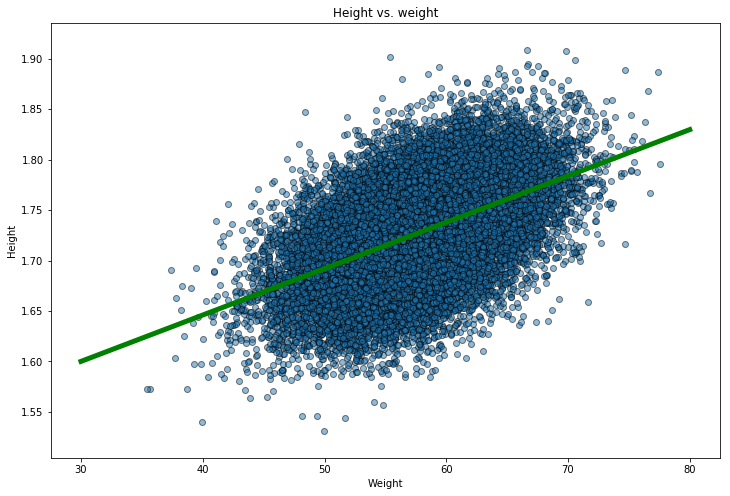

In [15]:
plt.figure(figsize=(12,8))

plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')

x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, w0_opt + w1_opt * x, c='green', linewidth=5)

## Регуляризация Lasso и Ridge

Рассмотрим, как переобучаются линейные модели, почему так происходит, и выясним, как диагностировать и контролировать переобучение с помощью регуляризации.

Возьмем известный нам уже датасет о прокатах велосипедов. Его можно рассматривать в свете регрессии и предсказывать количество прокатов в зависимости от погоды.

```
season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
yr: 0 - 2011, 1 - 2012
mnth: от 1 до 12
holiday: 0 - нет праздника, 1 - есть праздник
weekday: от 0 до 6
workingday: 0 - нерабочий день, 1 - рабочий день
weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
temp: температура в Цельсиях
atemp: температура по ощущениям в Цельсиях
hum: влажность
windspeed(mph): скорость ветра в милях в час
windspeed(ms): скорость ветра в метрах в секунду
cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)
```

In [16]:
df = pd.read_csv('../../data/bikes_rent.csv.gz')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [17]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


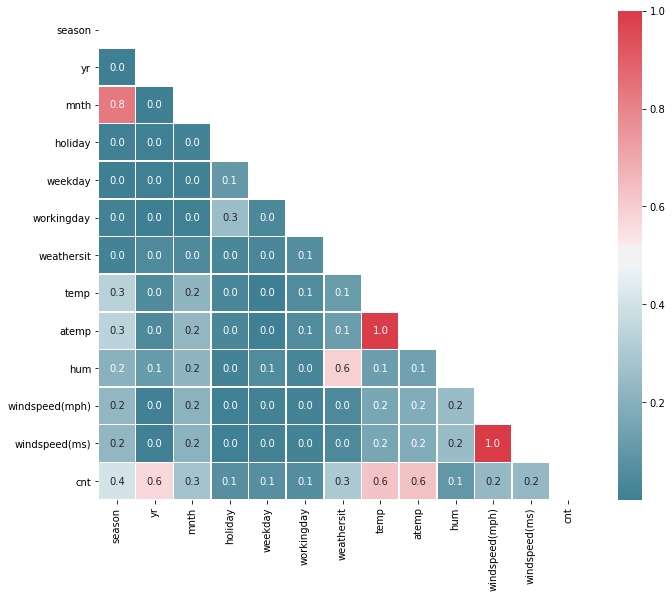

In [18]:
corr = np.abs(df.corr())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

Судя по корреляционной матрице есть несколько признаков который сильно коррелируют с целевой переменной - числом прокатов.

Как мы помними в линейной регрессии используются взвешенные суммы признаков, поэтому все они должны быть одного масштаба. (Что бы избежать расхождения алгоритма градиентного спуска) Проверим, так ли это у нас.

In [19]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Как мы видим все они разного масштаба, следовательно их требуется отмасштабировать. Можно использовать простой `sklearn.preprocessing.StandardScaler`. Суть его очень простая - приводить всё к нулевому среднему и масштабировать до единичного значения разброса. Получается такая формула для вычисления значения признака: 
$$x_i = \frac{x_i - mean(X)}{stdev(X)}$$

Тогда $Mean(X) = 0$ и $Stdev(X) = 1$

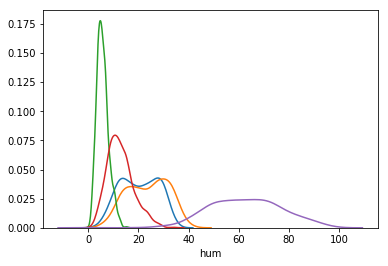

In [20]:
sns.distplot(df['temp'], hist=False)
sns.distplot(df['atemp'], hist=False)
sns.distplot(df['windspeed(ms)'], hist=False)
sns.distplot(df['windspeed(mph)'], hist=False)
sns.distplot(df['hum'], hist=False)
# и так далее

In [21]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [22]:
df = shuffle(df, random_state=42)
X = df.drop(['cnt'], axis=1)
y = df['cnt']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X.mean(axis=0)

array([  2.43003672e-16,  -8.26212483e-17,   4.73857160e-17,
         4.43481701e-17,   2.79454222e-17,  -1.16641762e-16,
        -3.15904773e-17,  -1.21501836e-16,  -2.52723818e-16,
         3.20764847e-16,  -1.26361909e-16,   3.20764847e-16])

In [24]:
X.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

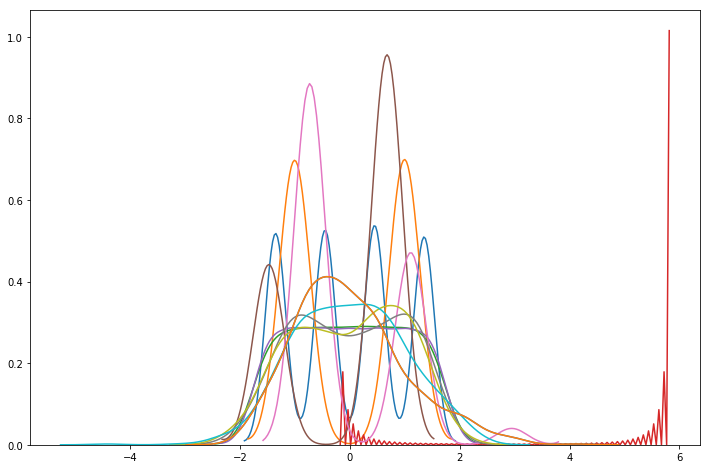

In [25]:
plt.figure(figsize=(12,8))
for i in range(0,12):
    sns.distplot(X[:,i], hist=False)

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)  # обучение. Может выдать warning про LAPACK - всё ок
for coef, col in sorted(zip(lr.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

56.3917 	 workingday
-86.7579 	 holiday
137.2264 	 weekday
-141.3027 	 mnth
-145.608 	 hum
-330.2298 	 weathersit
367.4527 	 temp
570.8666 	 season
585.5809 	 atemp
1021.9651 	 yr
12458291843702.6 	 windspeed(mph)
-12458291843901.049 	 windspeed(ms)


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


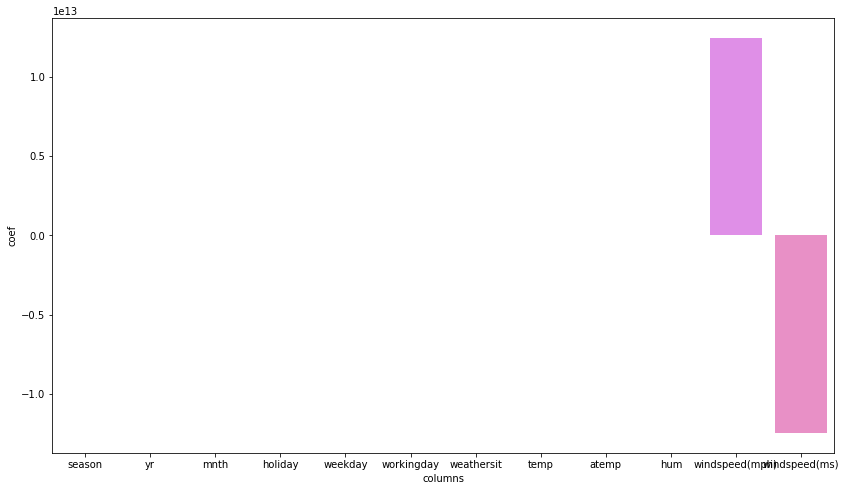

In [27]:
# Магнитуда признаков
plt.figure(figsize=(14,8))
sns.barplot(x='columns', y='coef',data=pd.DataFrame(list(zip(lr.coef_, df.columns)), columns=["coef", "columns"]))

Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках.
Чтобы понять, почему так произошло, вспомним аналитическую формулу, по которой вычисляются веса линейной модели в методе наименьших квадратов: $w = (X^TX)^{-1} X^T y$.

Если в X есть коллинеарные (линейно-зависимые) столбцы, матрица $X^TX$ становится вырожденной, и формула перестает быть корректной. Чем более зависимы признаки, тем меньше определитель этой матрицы и тем хуже аппроксимация $Xw \approx y$. Такая ситуацию называют проблемой мультиколлинеарности, вы обсуждали ее на лекции.

С парой temp-atemp чуть менее коррелирующих переменных такого не произошло, однако на практике всегда стоит внимательно следить за коэффициентами при похожих признаках.

Решение проблемы мультиколлинеарности состоит в регуляризации линейной модели. К оптимизируемому функционалу прибавляют L1 или L2 норму весов, умноженную на коэффициент регуляризации $\alpha$. В первом случае метод называется Lasso, а во втором – Ridge.

#### Lasso (L1)

$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$, где $\alpha$ - это коэффициент регуляризации.

#### Ridgge (L2)

$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$, где $\alpha$ - это коэффициент регуляризации.

---

Рассмотрим на примере как разная регуляризация влияет на веса $w$ модели.

In [28]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
lasso.fit(X, y)

for coef, col in sorted(zip(lasso.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

-0.0 	 windspeed(ms)
55.2124 	 workingday
-86.1528 	 holiday
-128.7306 	 mnth
137.3479 	 weekday
-144.1292 	 hum
-197.1397 	 windspeed(mph)
-332.3699 	 weathersit
376.3632 	 temp
560.2416 	 season
576.5308 	 atemp
1019.4635 	 yr


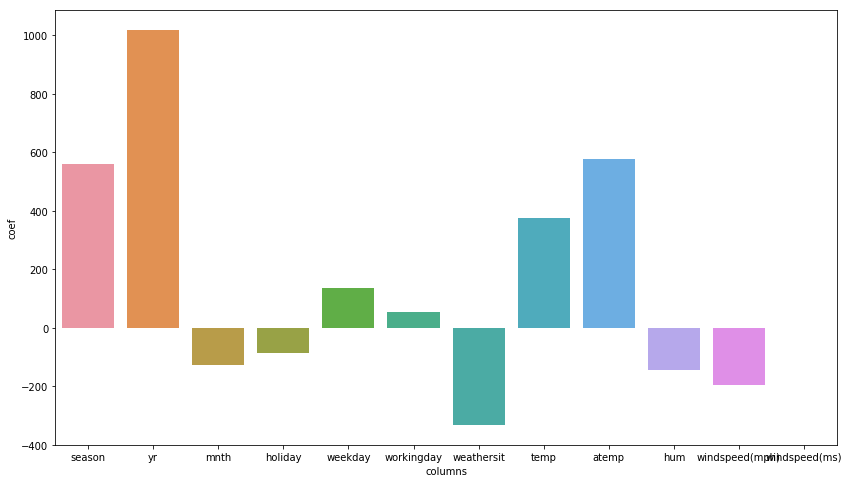

In [29]:
# Магнитуда признаков
plt.figure(figsize=(14,8))
sns.barplot(x='columns', y='coef',data=pd.DataFrame(list(zip(lasso.coef_, df.columns)), columns=["coef", "columns"]))

In [30]:
ridge = Ridge()
ridge.fit(X, y)

for coef, col in sorted(zip(ridge.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

55.9031 	 workingday
-86.7461 	 holiday
-99.2594 	 windspeed(mph)
-99.2594 	 windspeed(ms)
-131.8733 	 mnth
138.0051 	 weekday
-145.0713 	 hum
-332.3498 	 weathersit
386.4579 	 temp
563.0646 	 season
566.347 	 atemp
1018.9484 	 yr


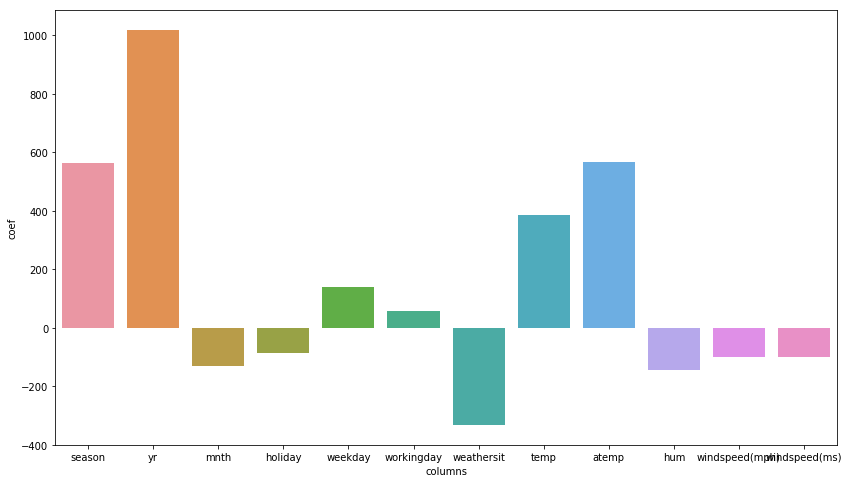

In [31]:
# Магнитуда признаков
plt.figure(figsize=(14,8))
sns.barplot(x='columns', y='coef',data=pd.DataFrame(list(zip(ridge.coef_, df.columns)), columns=["coef", "columns"]))

Как мы видим, Lasso контролирует веса модели обнуляя веса при бесполезных признаках. Ridge просто контролирует величину коэффициентов. В любом случае регуляризатор просто вводит штрафы на очень большие веса $w$.

#### Коэффициент регуляризации

Посмотрим как изменение коэффициента регуляризации влияет на веса.

In [32]:
alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha, random_state=42)
    lasso.fit(X, y)
    coefs_lasso[i, :] = lasso.coef_
    
    ridge = Ridge(alpha = alpha, random_state=42)
    ridge.fit(X, y)
    coefs_ridge[i, :] = ridge.coef_
    
    i += 1

Text(0.5,1,'Ridge')

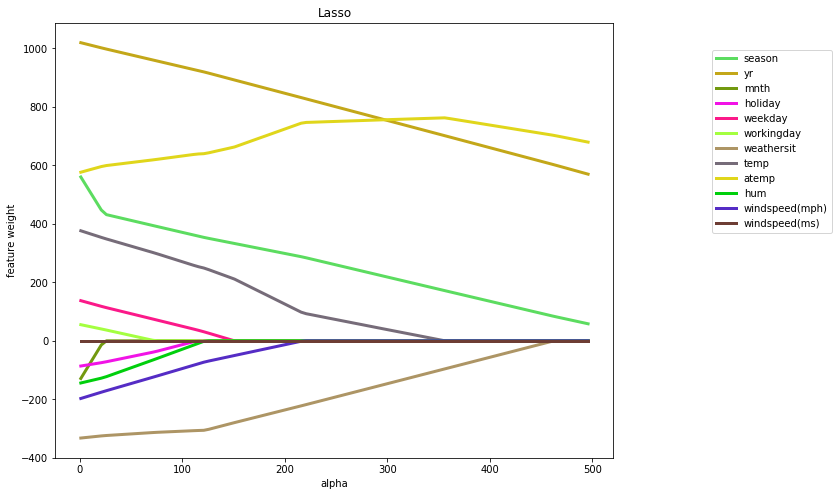

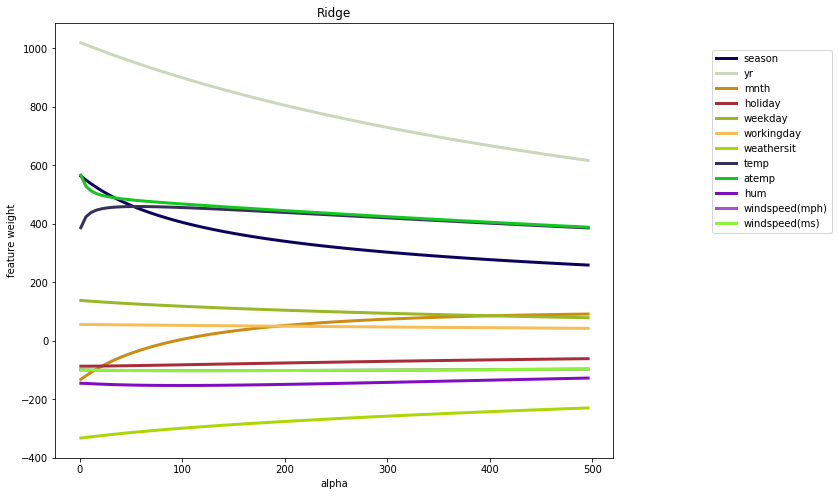

In [33]:
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

- Судя по графику Lasso(L1) агрессивнее уменьшает веса, чем Ridge(L2)
- В случае с L1 регуляризатором, увеличение alpha сколлапсирует все веса в ноль. Это происходит из-за характера функции регуляризации. В L1 - это $sum(|W|) * alpha$ в то время как в L2 это $sum(W^2) * alpha$. Тогда L1 слагамемое регуляризации будет больше чем слагаемое L2 регуляризации. А оптимальное значение будет достигаться в 0. Кроме того L1 производит отбор признаков, зануляя неинформативные.

### Выбор лучшего alpha

Итак, мы видим, что при изменении alpha модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее alpha.

Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть Mean Square Error.

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать alpha по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую (это называется holdout), то настроимся на конкретные "новые" данные, и вновь можем переобучиться. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения alpha, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на K частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку.

Делать кросс-валидацию для регрессии в sklearn совсем просто: для этого есть специальный регрессор, LassoCV, который берет на вход список из alpha и для каждого из них вычисляет MSE на кросс-валидации. После обучения (если оставить параметр cv=3 по умолчанию) регрессор будет содержать переменную mse_path_, матрицу размера len(alpha) x k, k = 3 (число блоков в кросс-валидации), содержащую значения MSE на тесте для соответствующих запусков. Кроме того, в переменной alpha_ будет храниться выбранное значение параметра регуляризации, а в coef_, традиционно, обученные веса, соответствующие этому alpha_.

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha = 1.7043727454909818


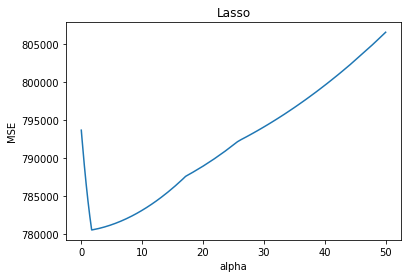

In [34]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.001, 50, 500)
lasso_cv = LassoCV(alphas=alphas, random_state=42)
lasso_cv.fit(X, y)
mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)
plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))

In [35]:
coef = pd.DataFrame(list(zip(np.round(lasso_cv.coef_, 2), df.columns)))
coef.columns = ['weight', 'feature']
coef.sort_values(['weight'], ascending=False)

,weight,feature
1,1018.84,yr
8,577.20,atemp
0,556.27,season
7,375.58,temp
4,136.67,weekday
5,54.70,workingday
11,-0.00,windspeed(ms)
3,-85.75,holiday
2,-124.69,mnth
9,-143.55,hum


In [36]:
from sklearn.model_selection import cross_val_score

error = abs(np.mean(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, scoring='neg_mean_absolute_error')))
np.round(error,3)

654.17600000000004

In [37]:
# Всего прокатов было совершено за всё время
total_cnt = df.cnt.sum()
total_cnt

3292679

In [38]:
"Доля ошибок: {:.2%}".format((error*X.shape[0]) / total_cnt)

'Доля ошибок: 14.52%'

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape)

reg = Lasso(lasso_cv.alpha_)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

(548, 12) (183, 12)


### Визуализация ошибки регресси

Интересно же посмотреть на графике где и как ошибается предсказание!

In [40]:
from sklearn.metrics import mean_squared_error

prediction = pd.DataFrame(np.vstack((pred, y_test)).T, columns=["pred", "target"])
prediction['MSE'] = np.power(prediction['pred'] - prediction['target'], 2)
prediction['MAE'] = np.abs(prediction['pred'] - prediction['target'])
prediction.sort_values(by='MAE', inplace=True)
prediction.head()

,pred,target,MSE,MAE
84,2723.648381,2729.0,28.639822,5.351619
164,3961.542776,3956.0,30.722367,5.542776
19,7455.035536,7446.0,81.640919,9.035536
3,5094.804908,5084.0,116.746042,10.804908
107,6221.534496,6234.0,155.388800,12.465504


In [41]:
# общая ошибка предсказателя в количестве прокатов
prediction.MAE.sum()

119740.67724962124

Text(0,0.5,'MAE')

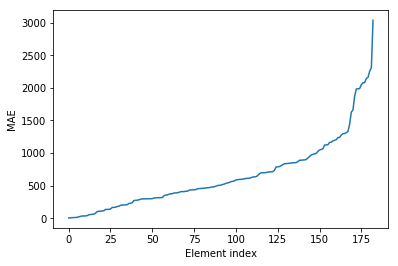

In [42]:
plt.plot(range(0, prediction.shape[0]), prediction['MAE'])
plt.xlabel("Element index")
plt.ylabel("MAE")

Text(0,0.5,'Target/Predicted value')

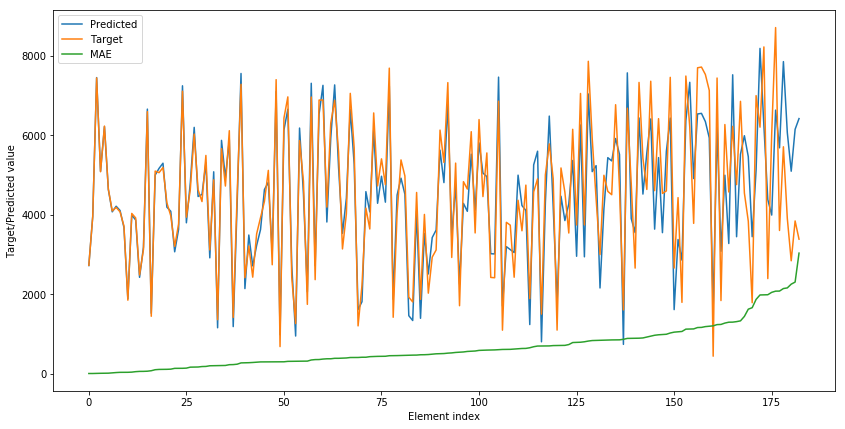

In [43]:
plt.figure(figsize=(14,7))

plt.plot(range(0, prediction.shape[0]), prediction['pred'])
plt.plot(range(0, prediction.shape[0]), prediction['target'])
plt.plot(range(0, prediction.shape[0]), prediction['MAE'])
plt.legend(["Predicted", "Target", "MAE"])

plt.xlabel("Element index")
plt.ylabel("Target/Predicted value")

## Бонус секция

Пример с полиномиальной регрессией и проблемой мультиколлинеарности, как было рассказано на лекции.

Взято из материалов мастеркласса Aiarlabs https://github.com/mephistopheies/mlworkshop39_042017.

In [44]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

Shape of X is (25,)
Head of X is [ 0.03144737  0.22642109  0.35850006  0.52202641  0.52202641  1.10065809
  1.64784239  1.78621084  2.08810563  2.18244775]


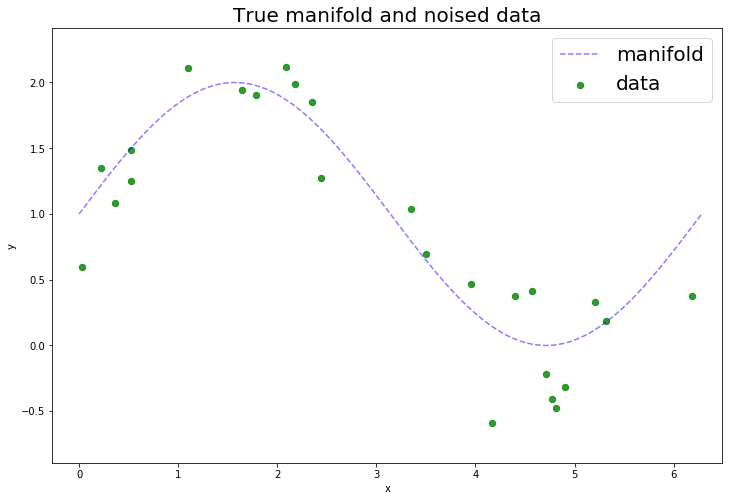

In [45]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)

print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

margin = 0.3
plt.figure(figsize=(12, 8))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

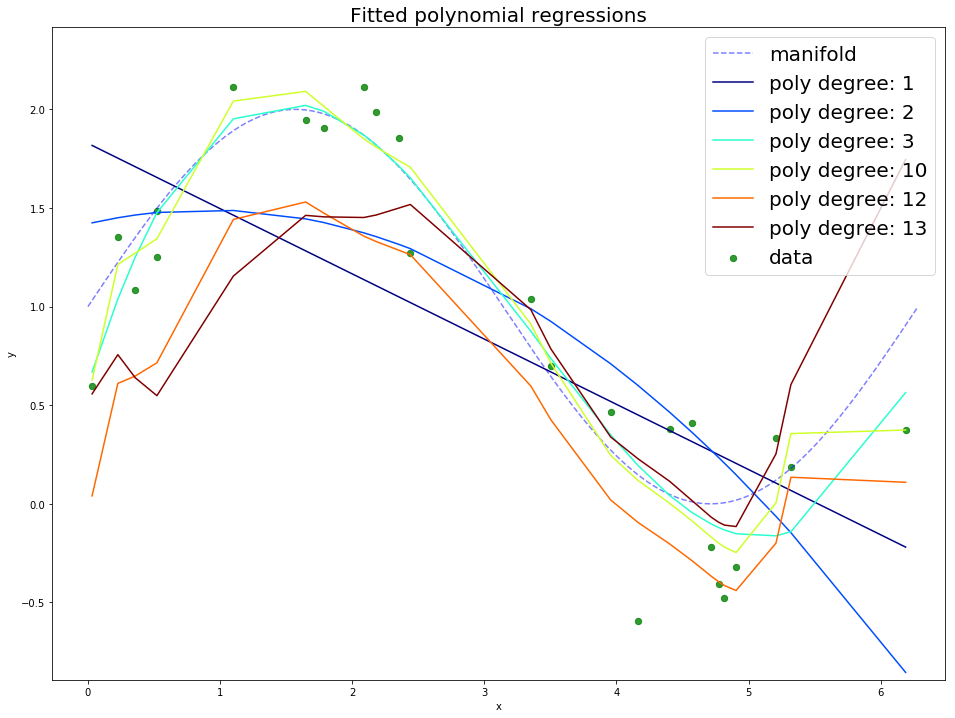

In [46]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.figure(figsize=(16, 12))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()